In [ ]:
#### Packages ####
from pathlib import Path
from argparse import Namespace
from collections import Counter
import json
import os
import string
import time
import math
import numpy as np
import pandas as pd
from google_drive_downloader import GoogleDriveDownloader as gdd #just to open our file
import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.rcParams['figure.figsize'] = [10, 10]
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#### Setting Direc
import os
os.chdir("/content/drive/My Drive/LMU-Statistik/SS22/WWC Hackathon for Social Good/wwcode-hackathon-2022/data")

In [75]:
# assign directory
directory = "climate-new-db-dataset/articles/"
# empty list for dataframes
dfs = []
# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        #print(f)
        #print(filename.split(".")[0])
        this_df = pd.read_json(f, lines=True)
        this_df["source"] = filename.split(".")[0]
        dfs.append(this_df)

# Combine all dfs
df = pd.concat(dfs)

In [80]:
# Convert "date_published" and "date_uploaded" to datetime format
df['date_published']= pd.to_datetime(df['date_published'])
df['date_uploaded']= pd.to_datetime(df['date_uploaded'])

In [81]:
# Overview of combined data
print(df.shape)
print(df.columns)
print(df.info())

(33362, 9)
Index(['id', 'body', 'headline', 'article_name', 'article_url',
       'date_published', 'article_length', 'date_uploaded', 'source'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 33362 entries, 0 to 3618
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              0 non-null      float64       
 1   body            33362 non-null  object        
 2   headline        33059 non-null  object        
 3   article_name    27674 non-null  object        
 4   article_url     33362 non-null  object        
 5   date_published  33072 non-null  datetime64[ns]
 6   article_length  33362 non-null  int64         
 7   date_uploaded   33362 non-null  datetime64[ns]
 8   source          33362 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 2.5+ MB
None


In [102]:
df.drop_duplicates(subset=['headline', 'body', 'article_url'], keep='first', inplace=True)

In [103]:
print(df.shape)
print(df.columns)
print(df.info())

(9352, 9)
Index(['id', 'body', 'headline', 'article_name', 'article_url',
       'date_published', 'article_length', 'date_uploaded', 'source'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9352 entries, 0 to 3551
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              0 non-null      float64       
 1   body            9352 non-null   object        
 2   headline        9318 non-null   object        
 3   article_name    8664 non-null   object        
 4   article_url     9352 non-null   object        
 5   date_published  9146 non-null   datetime64[ns]
 6   article_length  9352 non-null   int64         
 7   date_uploaded   9352 non-null   datetime64[ns]
 8   source          9352 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 730.6+ KB
None


In [106]:
# Export dataframe to csv
df.to_csv('climate-news-db-all.csv', encoding='utf-8')

## Explore Dataset

In [107]:
# Date range of articles
print(df['date_published'].min())
print(df['date_published'].max())

1970-01-01 15:12:00
2022-06-25 14:44:24


In [108]:
# Number of articles per year
df['headline'].groupby(df['date_published'].dt.year).agg('count')

date_published
1970.0      23
1997.0       1
1998.0       1
1999.0       1
2000.0       1
2001.0       9
2002.0       4
2004.0       1
2005.0      21
2006.0      17
2007.0      23
2008.0       9
2009.0      36
2010.0      47
2011.0      47
2012.0      52
2013.0      78
2014.0     152
2015.0     268
2016.0     224
2017.0     460
2018.0     618
2019.0    1828
2020.0    2411
2021.0    2182
2022.0     598
Name: headline, dtype: int64

In [109]:
# List all data sources
print(len(df['source'].unique()))
print(df['source'].unique())

16
['aljazeera' 'atlantic' 'bbc' 'cnn' 'nytimes' 'stuff' 'washington_post'
 'fox' 'newshub' 'economist' 'skyau' 'nzherald' 'guardian' 'dw'
 'dailymail' 'independent']


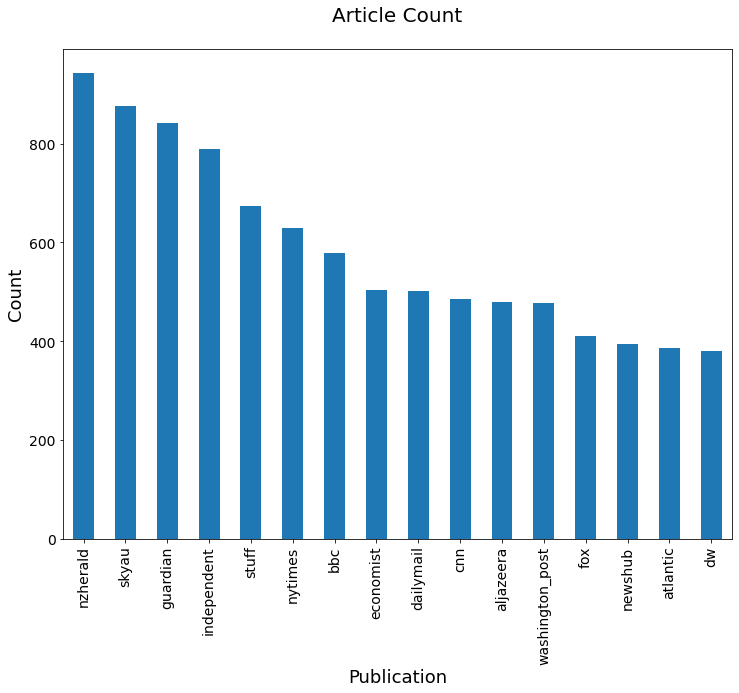

In [110]:
# Number of articles by Source
ax = df['source'].value_counts().plot(kind='bar', fontsize=14, figsize=(12,9))
ax.set_title('Article Count\n', fontsize=20)
ax.set_xlabel('Publication', fontsize=18)
ax.set_ylabel('Count', fontsize=18);

In [111]:
df.head()

,id,body,headline,article_name,article_url,date_published,article_length,date_uploaded,source
0,NaN,An exhibition looking at the legacy of colonia...,Is colonialism to blame for dire situation wit...,is-colonialism-to-blame-for-dire-situation-wit...,https://www.aljazeera.com/program/inside-story...,2021-10-16 19:22:57,654,2022-06-26 06:30:01.413068,aljazeera
1,NaN,With the lifting of US sanctions the main focu...,Iran’s failure to tackle climate change – a qu...,irans-failure-to-tackle-climate-change-a-quest...,https://www.aljazeera.com/news/2021/11/9/irans...,2021-11-09 14:43:08,7262,2022-06-26 06:30:05.207714,aljazeera
2,NaN,The US and China agree on the need for stronge...,"US, China agree to tackle climate crisis with ...",us-china-agree-to-tackle-climate-crisis-with-u...,https://www.aljazeera.com/news/2021/4/18/us-ch...,2021-04-18 04:28:58,4388,2022-06-26 06:30:10.706681,aljazeera
3,NaN,“This moment in history is a real moment of op...,Climate Change: Story of Our Time,climate-change-story-of-our-time,https://www.aljazeera.com/program/between-us/2...,2021-04-13 13:13:04,345,2022-06-26 06:30:14.519357,aljazeera
4,NaN,Prime Minister Bob Loughman says using the ter...,‘We are in danger now’: Vanuatu declares clima...,we-are-in-danger-now-vanuatu-declares-climate-...,https://www.aljazeera.com/news/2022/5/28/we-ar...,2022-05-28 07:33:53,3054,2022-06-26 06:30:16.809079,aljazeera
